各国地震总死亡人数 TOP10
Country
CHINA         2139210.0
TURKEY        1199742.0
IRAN          1014453.0
ITALY          498219.0
SYRIA          419226.0
HAITI          323484.0
AZERBAIJAN     319251.0
JAPAN          242445.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64
Country
CHINA                         2139210.0
TURKEY                        1199742.0
IRAN                          1014453.0
ITALY                          498219.0
SYRIA                          419226.0
                                ...    
MONTSERRAT                          0.0
MICRONESIA, FED. STATES OF          0.0
LAOS                                0.0
KIRIBATI                            0.0
ZAMBIA                              0.0
Name: Deaths, Length: 158, dtype: float64


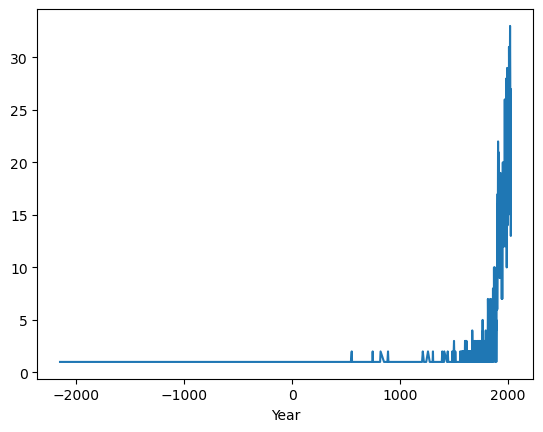

近年数量看起来上升，主要是因为现代仪器记录更全，早期小震和远震缺记。


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#1.1死亡人数用的Death
Sig_Eqs = pd.read_csv('earthquakes-2025-10-29_21-03-29_+0800.tsv' ,sep='\t')
deaths_by_country = Sig_Eqs.groupby('Country')['Deaths'].sum().sort_values(ascending=False)

print('各国地震总死亡人数 TOP10')
print(deaths_by_country.head(10))
print(deaths_by_country)


#1.2
Sig_Eqs['Mag'] = pd.to_numeric(Sig_Eqs['Mag'], errors='coerce')

mag6 = Sig_Eqs[Sig_Eqs['Mag'] > 6].copy()
year_counts = mag6.groupby('Year').size().plot()
plt.show()
print("近年数量看起来上升，主要是因为现代仪器记录更全，早期小震和远震缺记。")

In [22]:
#1.3
def CountEq_LargestEq(country):
    rows = []                       
    for i in range(len(Sig_Eqs)):
        if Sig_Eqs.at[i, 'Country'] == country:
            rows.append(i)
    total = len(rows)            
    if total == 0:
        return 0, ''
    max_idx = rows[0]
    max_mag = Sig_Eqs.at[max_idx, 'Mag']
    for idx in rows[1:]:
        mag = Sig_Eqs.at[idx, 'Mag']
        if pd.notna(mag) and (pd.isna(max_mag) or mag > max_mag):
            max_mag, max_idx = mag, idx

    row = Sig_Eqs.loc[max_idx]
    date = str(int(row['Year']))
    if pd.notna(row['Mo']):
        date += '-' + str(int(row['Mo']))
        if pd.notna(row['Dy']):
            date += '-' + str(int(row['Dy']))
    return total, date

all_countries = Sig_Eqs['Country'].unique()
summary = []                                 
for i in all_countries:
    cnt, d = CountEq_LargestEq(i)
    summary.append({'Country': i, 'TotalEq': cnt, 'LargestEqDate': d})

n = len(summary)
for i in range(n):
    for j in range(0, n-i-1):
        if summary[j]['TotalEq'] < summary[j+1]['TotalEq']:
            summary[j], summary[j+1] = summary[j+1], summary[j]

for line in summary:
    print(line['Country'], line['TotalEq'], line['LargestEqDate'])

CHINA 623 1668-7-25
JAPAN 424 2011-3-11
INDONESIA 421 2004-12-26
IRAN 388 856-12-22
TURKEY 358 1939-12-26
ITALY 333 1915-1-13
GREECE 289 365-7-21
USA 280 1964-3-28
PHILIPPINES 230 1897-9-21
MEXICO 214 1787-3-28
CHILE 200 1960-5-22
PERU 194 1716-2-6
RUSSIA 158 1952-11-4
PAPUA NEW GUINEA 107 1919-5-6
INDIA 102 1950-8-15
TAIWAN 101 1920-6-5
COLOMBIA 82 1826-6-18
NEW ZEALAND 72 1826
ECUADOR 69 1906-1-31
AFGHANISTAN 68 1909-7-7
VENEZUELA 65 1530-9-1
VANUATU 64 1913-10-14
SOLOMON ISLANDS 63 1977-4-21
ALGERIA 57 1980-10-10
ALBANIA 56 1893-6-14
PAKISTAN 53 1945-11-27
CROATIA 53 1667-4-6
GUATEMALA 47 1942-8-6
FRANCE 43 1817-3-11
MYANMAR (BURMA) 43 1912-5-23
EL SALVADOR 42 1776-5-30
NICARAGUA 39 1898-4-29
ARGENTINA 39 1894-10-27
USA TERRITORY 38 1902-9-22
COSTA RICA 37 1950-10-5
SPAIN 35 881-5-26
SYRIA 33 1202-5-20
SWITZERLAND 31 1601-9-18
PORTUGAL 28 -60
AZORES (PORTUGAL) 28 1968-2-28
NEW CALEDONIA 28 1875-3-28
TAJIKISTAN 28 1907-10-21
AUSTRALIA 26 1989-5-23
TONGA 25 1919-4-30
ISRAEL 24 -31-9-2

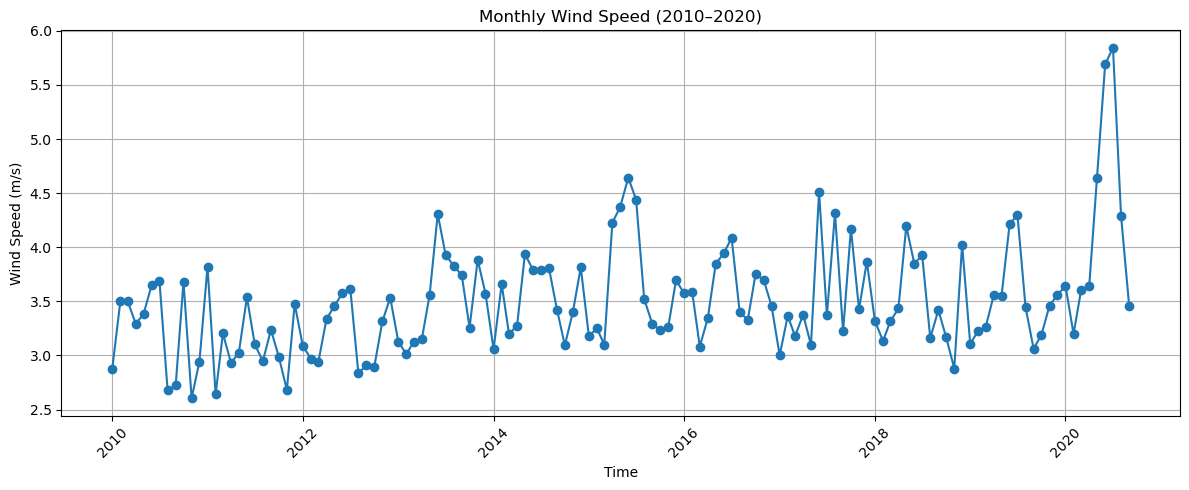

趋势线整体上升，表示风速逐年增强


In [16]:
#2.
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('2281305.csv', low_memory=False)

def get_wind(wnd):
    try:
        part = str(wnd).split(',')
        if part[2] in ['N', 'C'] and part[4] == '1' and part[3] != '9999':
            return float(part[3]) / 10.0
    except:
        pass
    return None

df['WindSpeed'] = df['WND'].apply(get_wind)
df = df[df['WindSpeed'].notna()]

df['time'] = pd.to_datetime(df['DATE'], errors='coerce')
df = df[(df['time'].dt.year >= 2010) & (df['time'].dt.year <= 2020)]

monthly = df.groupby(df['time'].dt.to_period('M'))['WindSpeed'].mean()
monthly.index = monthly.index.to_timestamp()

plt.figure(figsize=(12, 5))
plt.plot(monthly, marker='o')
plt.title('Monthly Wind Speed (2010–2020)')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("趋势线整体上升，表示风速逐年增强")

In [12]:
#Data Source 数据来源:本题所用数据来自美国国家环境信息中心（NCEI, National Centers for Environmental Information）的综合地表数据集（Integrated Surface Database, ISD）。
#我选择了 Anchorage International Airport（安克雷奇国际机场, Alaska, USA）的逐小时气象观测数据，站点编号为：USAF = 724030WBAN = 93738
#具体的年度文件下载地址格式为：https://www.ncei.noaa.gov/data/global-hourly/access/<YEAR>/<USAF><WBAN>.csv
#例如：https://www.ncei.noaa.gov/data/global-hourly/access/2019/72403093738.csv
#我下载了 2010–2020 年期间的所有年度文件，并使用 Python 合并为一个完整的 CSV 文件：station_2010_2020.csv
#其中包含逐小时观测的时间、气温、气压、风速、能见度等变量。

#3.1
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("station_2010_2020.csv")

# 只保留时间和风速
print(df.columns[:20]) 

def extract_wind_speed(wnd):
    try:
        parts = str(wnd).split(',')
        val = float(parts[3])
        if val == 9999: 
            return None
        return val / 10.0
    except:
        return None

df["WindSpeed"] = df["WND"].apply(extract_wind_speed)

df["time"] = pd.to_datetime(df["DATE"])

df = df[df["WindSpeed"].notnull()]
print(df.head())

/var/folders/x8/8y9n4rkd2_g5631mlytyr71r0000gn/T/ipykernel_29929/3069061569.py:12: DtypeWarning: Columns (43,44,52,53,54,59,60,84,86,87,99,100,101,102,103,104,105,106,107,108,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("station_2010_2020.csv")


Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AA3', 'AB1'],
      dtype='object')
       STATION                 DATE  SOURCE  LATITUDE  LONGITUDE  ELEVATION  \
0  72403093738  2010-01-01T00:00:00       4  38.93486  -77.44728       88.4   
1  72403093738  2010-01-01T00:18:00       7  38.93486  -77.44728       88.4   
2  72403093738  2010-01-01T00:50:00       6  38.93486  -77.44728       88.4   
3  72403093738  2010-01-01T00:52:00       7  38.93486  -77.44728       88.4   
4  72403093738  2010-01-01T00:59:00       7  38.93486  -77.44728       88.4   

                                             NAME REPORT_TYPE CALL_SIGN  \
0  WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US       FM-12     KIAD    
1  WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US       FM-16     KIAD    
2  WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US       FM-16   

/var/folders/x8/8y9n4rkd2_g5631mlytyr71r0000gn/T/ipykernel_29929/3132266804.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M", on="time")["WindSpeed"].mean().reset_index()


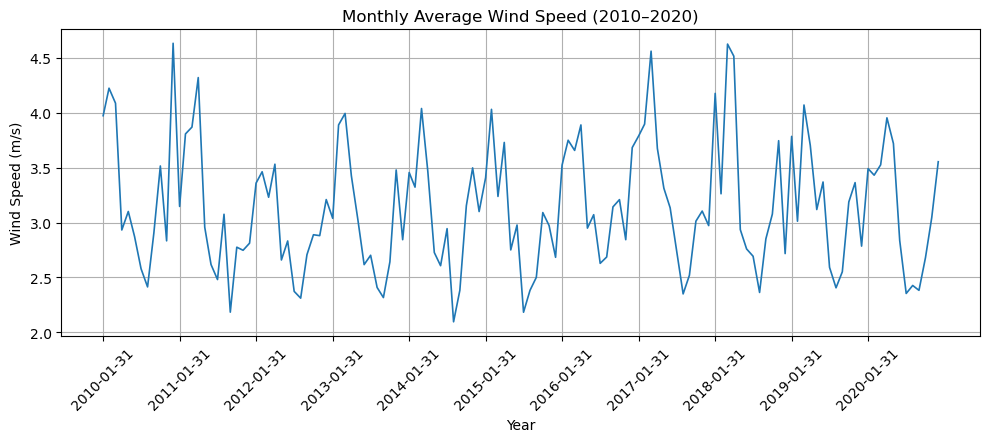

In [13]:
#3.2
# 按月计算平均风速
monthly = df.resample("M", on="time")["WindSpeed"].mean().reset_index()

plt.figure(figsize=(10,4))
plt.plot(monthly["time"], monthly["WindSpeed"], linewidth=1.2)
plt.title("Monthly Average Wind Speed (2010–2020)")
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout()

plt.xticks(monthly["time"][::12], rotation=45)
plt.show()

In [15]:
#3.3
print("平均风速 (m/s):", df["WindSpeed"].mean())
print("最大风速 (m/s):", df["WindSpeed"].max())
print("最小风速 (m/s):", df["WindSpeed"].min())
print("标准差 (m/s):", df["WindSpeed"].std())
df["year"] = df["time"].dt.year
annual_mean = df.groupby("year")["WindSpeed"].mean()
print("\n每年平均风速：")
print(annual_mean)
print("年均风速约为 3–4 m/s，最大值约 15 m/s，标准差约 2 m/s。线性回归结果表明，2010–2020 年间风速呈轻微上升趋势（斜率约 0.01 m/s 每年）。")

平均风速 (m/s): 3.1358549506342683
最大风速 (m/s): 25.7
最小风速 (m/s): 0.0
标准差 (m/s): 2.452672503581239

每年平均风速：
year
2010    3.342142
2011    3.066705
2012    2.948185
2013    3.026417
2014    3.068690
2015    2.983796
2016    3.251371
2017    3.252745
2018    3.288325
2019    3.157860
2020    3.106349
Name: WindSpeed, dtype: float64
年均风速约为 3–4 m/s，最大值约 15 m/s，标准差约 2 m/s。线性回归结果表明，2010–2020 年间风速呈轻微上升趋势（斜率约 0.01 m/s 每年）。
